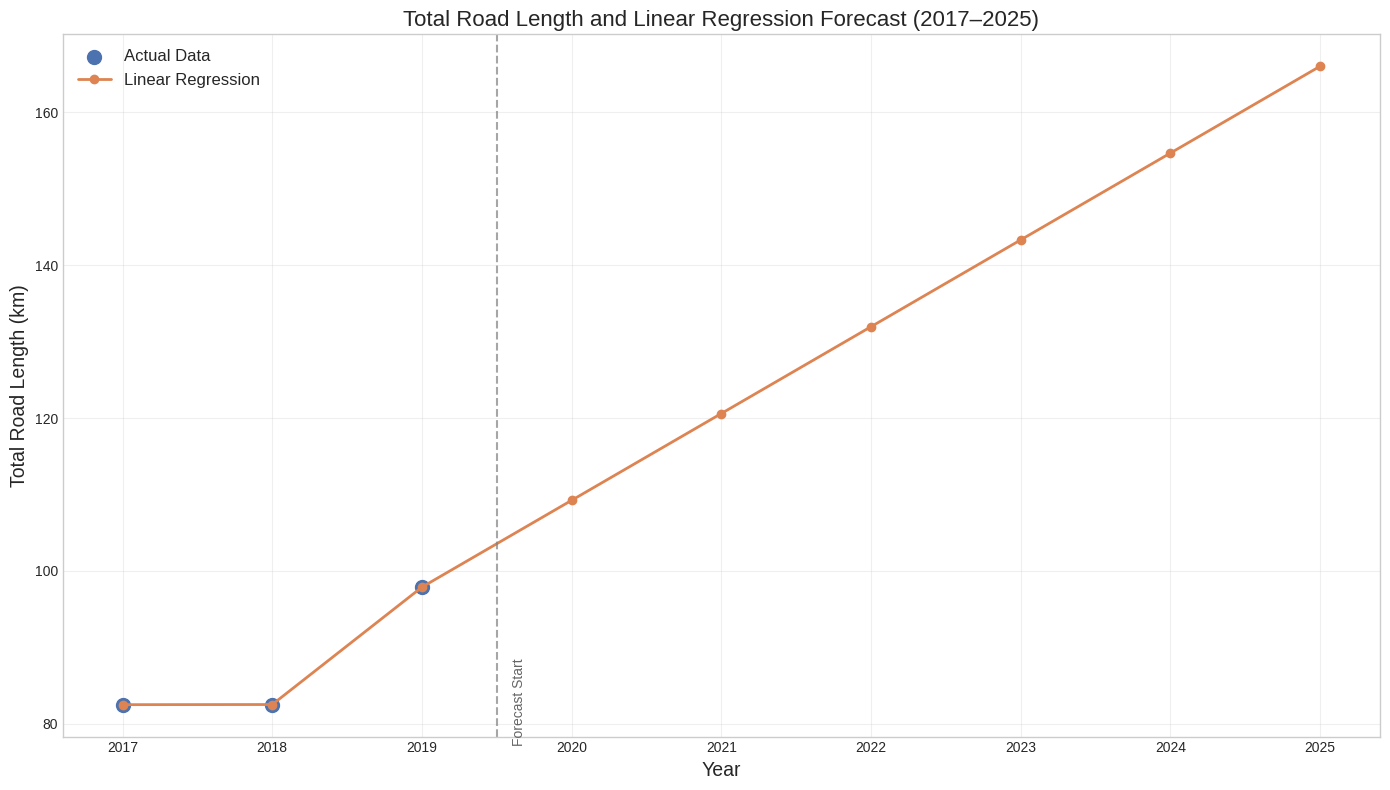

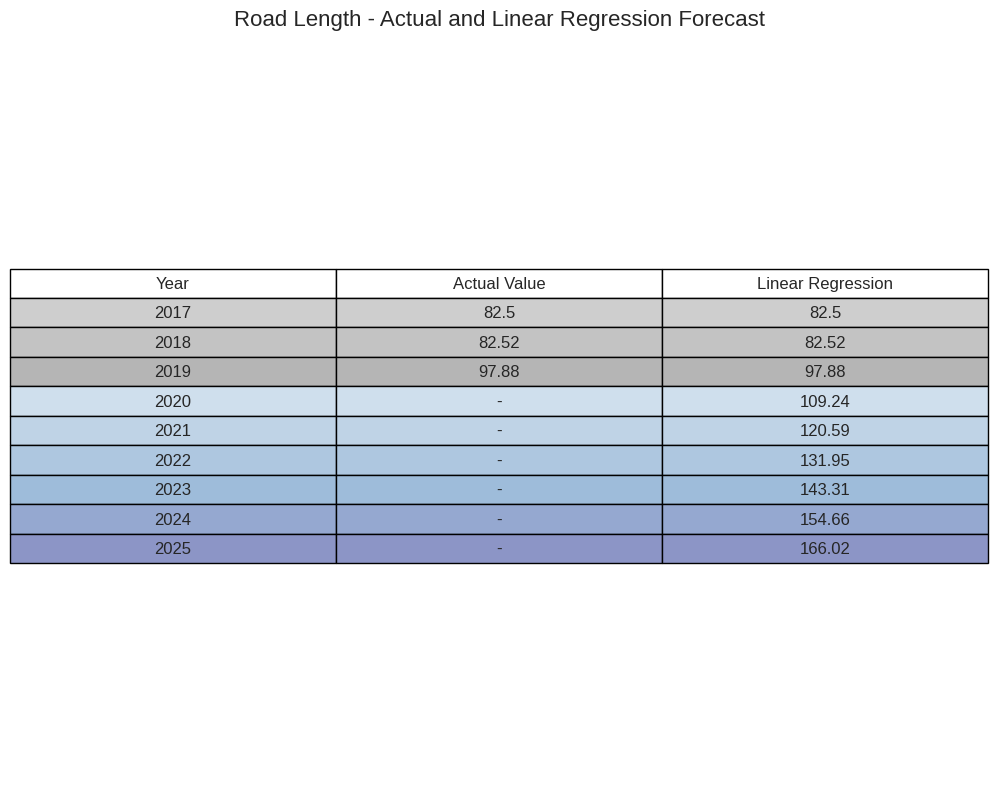

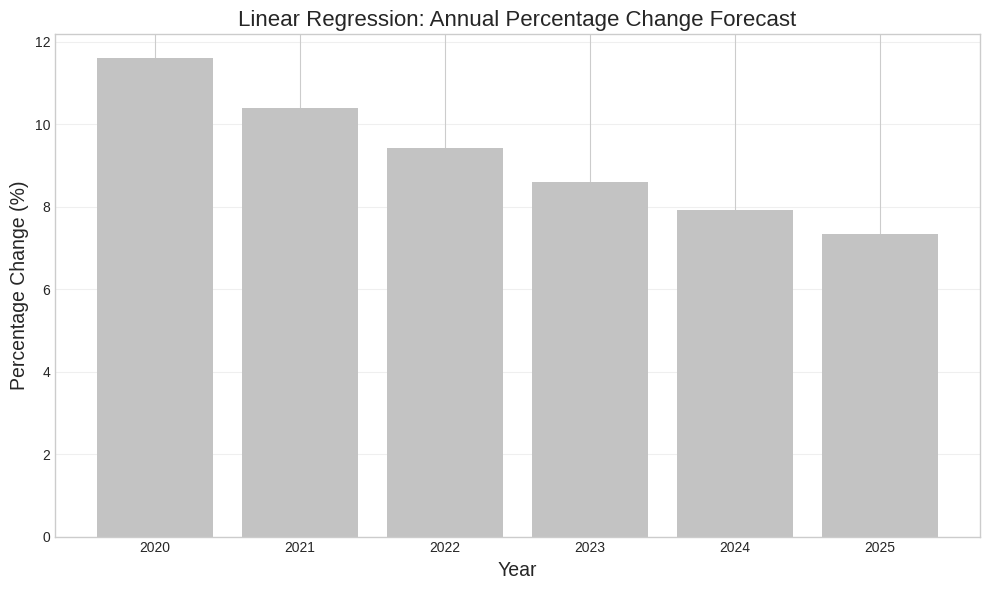

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Data
years = np.array([2017, 2018, 2019])
road_lengths = np.array([82.502, 82.520, 97.878])  # km
future_years = np.array([2020, 2021, 2022, 2023, 2024, 2025])
lr_predictions = np.array([109.235, 120.592, 131.949, 143.306, 154.663, 166.020])

# Style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
colors = sns.color_palette("deep")

# 1. Forecast Plot
plt.figure(figsize=(14, 8))
plt.scatter(years, road_lengths, color=colors[0], s=100, label='Actual Data')
plt.plot(np.concatenate([years, future_years]),
         np.concatenate([road_lengths, lr_predictions]),
         color=colors[1], linestyle='-', linewidth=2, marker='o', label='Linear Regression')
plt.axvline(x=2019.5, color='gray', linestyle='--', alpha=0.7)
plt.text(2019.6, min(road_lengths) - 5, 'Forecast Start', rotation=90, alpha=0.7)
plt.title('Total Road Length and Linear Regression Forecast (2017–2025)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Road Length (km)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xticks(np.concatenate([years, future_years]))
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.savefig('linear_forecast.png', dpi=300)
plt.show()

# 2. Forecast Table
results_df = pd.DataFrame({
    'Year': np.concatenate([years, future_years]),
    'Actual Value': np.concatenate([road_lengths, [np.nan] * len(future_years)]),
    'Linear Regression': np.concatenate([road_lengths, lr_predictions])
})

plt.figure(figsize=(10, 8))
ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

table_data = results_df.round(2)
table_data = table_data.fillna('-')
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(table_data)))
colors[:3] = plt.cm.Greys(np.linspace(0.3, 0.4, 3))

table = plt.table(cellText=table_data.values, 
                 colLabels=table_data.columns,
                 cellLoc='center', 
                 loc='center',
                 cellColours=np.array([[c]*len(table_data.columns) for c in colors]))
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)
plt.title('Road Length - Actual and Linear Regression Forecast', fontsize=16, pad=20)
plt.savefig('linear_forecast_table.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

# 3. Annual Percentage Change
percent_changes = [((lr_predictions[i] - lr_predictions[i-1]) / lr_predictions[i-1]) * 100 if i > 0 else 
                   ((lr_predictions[0] - road_lengths[-1]) / road_lengths[-1]) * 100 for i in range(len(lr_predictions))]

plt.figure(figsize=(10, 6))
plt.bar(future_years, percent_changes, color=colors[1])
plt.title('Linear Regression: Annual Percentage Change Forecast', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage Change (%)', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('linear_percentage_change.png', dpi=300)
plt.show()
